<a href="https://colab.research.google.com/github/kurtispykes/ml-from-scratch/blob/master/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import typing as t
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# creating a train and test dataset 
X_train, y_train = make_circles(n_samples=10000, noise=.05)
X_test, y_test = make_circles(n_samples=200, noise=.05)

# transposing for simplicity
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.reshape((1, y_train.shape[0])), y_test.reshape((1, y_test.shape[0]))

In [2]:
def he_initialization(layer_dims: list, 
                      random_state: t.Optional[int]=None
                      ) -> dict: 
  """
  Initialize neural network weights using he initialization
  (http://arxiv.org/abs/1502.01852) from a uniform distribution.

  Parameters
  ----------
  layer_dims: list 
    A list detailing the number of neurons in each layer. The length of the
    list determines the number of layers in the network (including input layer).
  random_state: int
    A seed to generate the same random numbers.

  Return
  ----------
  parameters: dict
    A dictionary containing the initialized weights. 
    Disclaimer - bias weights are all initalized to zero. 
  """
  np.random.seed(random_state)
  parameters = {}
  num_layers = len(layer_dims)

  for i in range(1, num_layers): 
    limit = np.sqrt(2/float(layer_dims[i-1]))
    parameters[f"W{i}"] = np.random.uniform(low=-limit, high=limit, size=(layer_dims[i], layer_dims[i-1]))
    parameters[f"b{i}"] = np.zeros((layer_dims[i], 1))
  return parameters
  
# initalizing 3 layer NN weights
params = he_initialization([X_train.shape[0], 4, 3, 1])
params

{'W1': array([[-0.38983035, -0.89453521],
        [-0.58021488, -0.25304912],
        [ 0.4383582 ,  0.33055966],
        [-0.16004868, -0.77240534]]),
 'W2': array([[ 0.44811701,  0.33828157, -0.39110288, -0.00487558],
        [ 0.58353667, -0.34552995, -0.15289273,  0.03661937],
        [-0.02783659, -0.40419987,  0.54664764,  0.00860773]]),
 'W3': array([[ 0.57832271, -0.25381305, -0.69840973]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'b2': array([[0.],
        [0.],
        [0.]]),
 'b3': array([[0.]])}

In [3]:
print(f"Weight 1: {params['W1'].shape}\nWeight 2: {params['W2'].shape}\nWeight 3: {params['W3'].shape}")

Weight 1: (4, 2)
Weight 2: (3, 4)
Weight 3: (1, 3)


In [4]:
def relu(Z: t.Optional[t.Union[int, np.array]]
         ) -> t.Optional[t.Union[int, np.array]]:
  """
  ReLU activation function.

  Parameters
  ----------
  Z: t.Optional[t.Union[int, np.array]
    A numpy array or scalar value of any size

  Return
  ----------
  parameters: dict
    A dictionary containing the initialized weights. 
    Disclaimer - bias weights are all initalized to zero.
    
  init_params: dict
    A dictionary containing the initialized weights. 
  """ 
  return np.maximum(0, Z)

def sigmoid(Z: t.Optional[t.Union[int, np.array]]
             ) -> t.Optional[t.Union[int, np.array]]:     
  """
  Sigmoid activation function.

  Parameters
  ----------
  Z: t.Optional[t.Union[int, np.array]
    A numpy array or scalar value of any size

  Return
  ----------
  parameters: dict
    A dictionary containing the initialized weights. 
    Disclaimer - bias weights are all initalized to zero.
    
  init_params: dict
    A dictionary containing the initialized weights.  
  """
  Z = Z.astype(np.float128)
  return 1 / (1 + np.exp(-Z))

def forward_pass(x:np.array,
                 parameters:dict
                 ) -> dict:
  """
  Performs forward propagation

  Parameters
  ----------
  x: np.array
    A numpy array of the given data. The shape of the data should be in
    (n_features, n_samples)

  Return
  ----------
  parameters: dict
    A dictionary containing the initialized weights. 
    Disclaimer - bias weights are all initalized to zero.
    
  init_params: dict
    A dictionary containing the initialized weights.  
  """
  init_params = parameters.copy()

  z1 = np.dot(parameters["W1"], x) + parameters["b1"]
  a1 = relu(z1)
  parameters["z1"] = z1
  parameters["a1"] = a1

  z2 = np.dot(parameters["W2"], a1) + parameters["b2"]
  a2 = relu(z2)
  parameters["z2"] = z2
  parameters["a2"] = a2

  z3 = np.dot(parameters["W3"], a2) + parameters["b3"]
  z3 = z3.astype(dtype="float128")
  a3 = sigmoid(z3)
  parameters["z3"] = z3
  parameters["a3"] = a3

  return parameters, init_params

params = he_initialization([X_train.shape[0], 4, 3, 1])

pred_params, init_params = forward_pass(X_train, params)
pred_params

{'W1': array([[-0.43993575, -0.39819365],
        [ 0.99157619, -0.3413676 ],
        [ 0.33603766,  0.66091697],
        [ 0.73666798, -0.22894142]]),
 'W2': array([[ 0.56107414, -0.027116  , -0.3353572 , -0.47143681],
        [ 0.61370231,  0.43138415, -0.46847495,  0.04270518],
        [-0.22859831, -0.21950783,  0.53704251, -0.57185608]]),
 'W3': array([[-0.64108134, -0.22988668, -0.15552054]]),
 'a1': array([[0.11594041, 0.07395744, 0.56868031, ..., 0.41474893, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.503736  ,
         0.        ],
        [0.12768688, 0.11403679, 0.        , ..., 0.        , 0.69960757,
         0.30775987],
        [0.        , 0.        , 0.        , ..., 0.        , 0.39103953,
         0.        ]]),
 'a2': array([[0.02223045, 0.00325255, 0.31907182, ..., 0.2327049 , 0.        ,
         0.        ],
        [0.01133479, 0.        , 0.34900042, ..., 0.25453237, 0.        ,
         0.        ],
       

In [5]:
def compute_log_loss(y: np.array, y_hat: np.array) -> float:
  """
  Compute the log loss

  Parameters
  ----------
  y: np.array
    A numpy array of the true labels
  y_hat: np.array
    A numpy array of the predicted labels

  Return
  ----------
  parameters: dict
    A scalar value
  """
  m = y.shape[1]
  J = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
  return J 


init_params = he_initialization([X_train.shape[0], 4, 3, 1])
params, _ = forward_pass(X_train, init_params)

compute_log_loss(y_train, params["a3"])

0.68922612054351680083

In [6]:
def backpropagation(x: np.array, y: np.array, parameters: dict) -> dict: 
    """
    Implement backpropagation 
    Credit: https://datascience-enthusiast.com/DL/Improving-DeepNeural-Networks-Initialization.html

    Parameters
    ----------
    x: np.array
      A numpy array of the given data. The shape of the data should be in
      (n_features, n_samples)
    y: np.array
      A numpy array of the true labels
    parameters: dict
      A dictionary containing weights from forward_pass()
    
    Return
    ----------
    gradients: dict
      A dictionary containing the gradients with respect to each parameters,
      activation, and pre-activation variables. 
    """
    m = x.shape[0]

    dz3 = 1./m * (parameters["a3"] - y)
    dW3 = np.dot(dz3, parameters["a2"].T)
    db3 = np.sum(dz3, axis=0)
    
    da2 = np.dot(parameters["W3"].T, dz3)
    dz2 = np.multiply(da2, parameters["a2"])
    dW2 = np.dot(dz2, parameters["a1"].T)
    db2 = np.sum(dz2, axis=0)
    
    da1 = np.dot(parameters["W2"].T, dz2)
    dz1 = np.multiply(da1, parameters["a1"])
    dW1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis=0)

    gradients = {
        "dz3": dz3, "dW3": dW3, "db3": db3,
        "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
        "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1
    }
    return gradients

init_params = he_initialization([X_train.shape[0], 4, 3, 1])
pred_params, init_params = forward_pass(X_train, init_params)
backpropagation(X_train, y_train, pred_params)

{'dW1': array([[  2.51964   ,  -2.85549848],
        [ -6.54161532,  -3.93686666],
        [  4.91256695,  -0.8931207 ],
        [-11.15760982,  -1.90368524]], dtype=float128),
 'dW2': array([[-2.76071917, -6.70549891, -2.40279481, -5.98690275],
        [-5.54025023, -2.28308989, -4.58328112, -0.56010956],
        [-1.50618789, -0.06650729, -1.91162308, -0.30825201]],
       dtype=float128),
 'dW3': array([[-36.97683837, -12.44506037,  -4.67279508]], dtype=float128),
 'da1': array([[-0.01775706,  0.01916655,  0.        , ..., -0.001486  ,
          0.04137239, -0.02098434],
        [ 0.00447583, -0.00466445,  0.        , ..., -0.00023058,
         -0.02870756,  0.00395518],
        [-0.01834904,  0.01871187,  0.        , ...,  0.00248553,
         -0.05764787, -0.01292907],
        [-0.00748378,  0.00733728,  0.        , ...,  0.00209699,
         -0.05281241, -0.00291582]], dtype=float128),
 'da2': array([[-0.11858993,  0.16488752, -0.14498877, ...,  0.14607891,
         -0.11358538, 

In [7]:
def update_parameters(init_params: dict, 
                      gradients: dict,
                      learning_rate: float
                      ) -> dict:
  """
  Perfrom parameter update 
  
  Parameters
  ----------
  init_param: dict
    The original initialized parameters
  gradients: dict
    A dictionary containing the gradients with respect to each parameters,
    activation, and pre-activation variables. 
  learning_rate: float
    Step size of gradient descent
  
  Return
  ----------
  new_params: dict
    A dictionary containing the updated parameters. 
  """
  num_layers = len(init_params) // 2
  new_params = init_params.copy()

  for i in range(1, num_layers-1): 
    new_params[f"W{i}"] = new_params[f"W{i}"] - learning_rate * gradients[f"dW{i}"]
    new_params[f"b{i}"] = new_params[f"b{i}"] - learning_rate * gradients[f"db{i}"]
  return new_params

init_params = he_initialization([X_train.shape[0], 4, 3, 1])
pred_params, init_params = forward_pass(X_train, init_params)
update_params = backpropagation(X_train, y_train, pred_params)

update_parameters(init_params, update_params, 0.01)

{'W1': array([[-0.1685307 , -0.18752917],
        [-0.89300283, -0.69037631],
        [ 0.24923499, -0.02502872],
        [-0.46303863, -0.47070765]], dtype=float128),
 'W2': array([[ 0.14267776,  0.14068145,  0.3735234 , -0.54227296],
        [ 0.58697229,  0.0473108 ,  0.66061265, -0.06975443],
        [-0.0893605 , -0.56183741,  0.50453268,  0.61193564]]),
 'W3': array([[0.39246487, 0.37374352, 0.34222643]]),
 'b1': array([[-4.54832083e-07,  1.59242107e-07, -2.50270314e-05, ...,
          1.24920509e-05, -3.07494930e-05, -2.08607969e-09],
        [-4.54832083e-07,  1.59242107e-07, -2.50270314e-05, ...,
          1.24920509e-05, -3.07494930e-05, -2.08607969e-09],
        [-4.54832083e-07,  1.59242107e-07, -2.50270314e-05, ...,
          1.24920509e-05, -3.07494930e-05, -2.08607969e-09],
        [-4.54832083e-07,  1.59242107e-07, -2.50270314e-05, ...,
          1.24920509e-05, -3.07494930e-05, -2.08607969e-09]],
       dtype=float128),
 'b2': array([[0.],
        [0.],
        [0.]]),

In [11]:
def ann(X:np.array,
        y: np.array,
        n_iter:int,
        layer_dims: list,
        learning_rate:float=0.01
        ) -> t.Union[dict, list]:
  """
  Run artificial neural network

  Parameters
  ----------
  X: np.array 
    A numpy array of the given data. The shape of the data should be in
    (n_features, n_samples)
  y: np.array
    A numpy array of true labels
  n_iter: int
    Number of iterations
  layer_dims: list
    The number of neurons in each layer. The length of the list 
    is the number of layers including input layer
  learning_rate: float
    Step size of gradient descent
  
  Return
  ----------
  pred_params: dict
    Weights of trained model 
  cost: list
    The cost at each iteration 
  """

  params = he_initialization(layer_dims)
  cost = []

  for i in range(n_iter):

    pred_params, init_params = forward_pass(X, params) 

    J = compute_log_loss(y, pred_params["a3"])

    updated_params = backpropagation(X, y, pred_params)

    params = update_parameters(init_params, updated_params, learning_rate)

    if i % 100 == 0: 
      print(f"Cost after iteration {i + 100}: {J}")
      cost.append(J)

  return pred_params, cost

params, cost = ann(X_train, y_train, 15000, layer_dims=[X_train.shape[0], 4, 3, 1])

Cost after iteration 100: 0.7044228406339578
Cost after iteration 200: 0.6937241631840132
Cost after iteration 300: 0.6934864286989116
Cost after iteration 400: 0.6933782582587701
Cost after iteration 500: 0.6933166163548018
Cost after iteration 600: 0.693276677969123
Cost after iteration 700: 0.6932486348965814
Cost after iteration 800: 0.6932278327919338
Cost after iteration 900: 0.6932118133951692
Cost after iteration 1000: 0.6931991154101088
Cost after iteration 1100: 0.6931887706144398
Cost after iteration 1200: 0.6931802007849819
Cost after iteration 1300: 0.6931729307884497
Cost after iteration 1400: 0.6931666957904564
Cost after iteration 1500: 0.6931613341972658
Cost after iteration 1600: 0.6931567046593125
Cost after iteration 1700: 0.6931526412164998
Cost after iteration 1800: 0.6931490575407315
Cost after iteration 1900: 0.6931458924882669
Cost after iteration 2000: 0.6931430570763454
Cost after iteration 2100: 0.6931405038307255
Cost after iteration 2200: 0.693138196127610

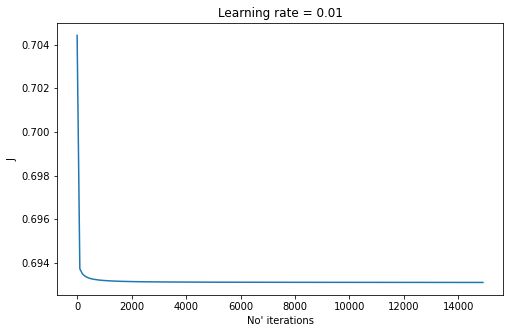

In [12]:
iter = np.arange(0, 15000, 100)

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(iter, cost)
plt.title("Learning rate = 0.01")
plt.xlabel("No' iterations")
plt.ylabel("J")
plt.show()

In [27]:
cost[-1]

0.69310146439040989713

In [16]:
def get_accuracy(X:np.array,
                 y:np.array,
                 parameters: dict
                 ) -> float:
    """
    Predict the results of a 3-layer neural network 
    Starter code: https://datascience-enthusiast.com/DL/Improving-DeepNeural-Networks-Initialization.html

    Arguments:
    X: np.array 
      A numpy array of the given data. The shape of the data should be in
      (n_features, n_samples)
    y: np.array
      A numpy array of true labels
    parameters: dict
      A dictionary containing weights from forward_pass()
    
    Returns:
    acc: float
      The model accuracy
    """
    
    m = X.shape[1]
    pred = np.zeros((1, m), dtype = np.int)
    
    # Forward propagation
    pred_params, _ = forward_pass(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(pred_params["a3"].shape[1]):
        if pred_params["a3"][0, i] > 0.5:
            pred[0, i] = 1
        else:
            pred[0, i] = 0
    
    acc = np.mean((pred[0, :] == y[0, :]))    
    return acc

In [23]:
get_accuracy(X_train, y_train, params)

0.503